## Credit card applications

Commercial banks receive a lot of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual's credit report. I just recently got a credit card, and the analysis of this dataset will give me a general idea of the most important features that makes one qualify for credit card

For this project, we will use [Credit Card approval dataset](http://archive.ics.uci.edu/ml/datasets/credit+approval) from the UCI machine learning repository, and compare different machine learning algorithms in predicting approval status. The metric for comparison that will be used is accuracy score. 

In [1]:
#necessary imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.utils.testing import ignore_warnings
# from sklearn.exceptions import ConvergenceWarning
# with warnings.catch_warnings():
#     warnings.filterwarnings("ignore", category=ConvergenceWarning)

## Load Dataset

In [2]:
#load dataset
cc_apps = pd.read_csv('crx.data', names = ["Gender", "Age", "Debt", "Married", "BankCustomer", "EducationLevel", "Ethnicity", "YearsEmployed", "PriorDefault", "Employed", \
                                         "CreditScore", "DriversLicense", "Citizen", "ZipCode", "Income", "ApprovalStatus"])

In [3]:
#inspect data
cc_apps.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [4]:
#get number of rows and columns
cc_apps.shape

(690, 16)

In [5]:
#check for missing values
cc_apps.isna().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

In [6]:
# basic info
cc_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  ApprovalStatus  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [7]:
#summary stats
cc_apps.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Debt,690.0,4.758725,4.978163,0.0,1.000,2.75,7.2075,28.0
YearsEmployed,690.0,2.223406,3.346513,0.0,0.165,1.00,2.6250,28.5
CreditScore,690.0,2.400000,4.862940,0.0,0.000,0.00,3.0000,67.0
Income,690.0,1017.385507,5210.102598,0.0,0.000,5.00,395.5000,100000.0


## Inspecting and Cleaning data

In [8]:
cc_apps.dtypes

Gender             object
Age                object
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode            object
Income              int64
ApprovalStatus     object
dtype: object

In [9]:
#inspect the object columns aside Age and Zipcode

for c in cc_apps.loc[:, cc_apps.dtypes == np.object].drop(['Age', 'ZipCode'], axis = 1).columns:
    print("----{}----".format(c))
    print(cc_apps[c].value_counts())
    print("\n")

----Gender----
b    468
a    210
?     12
Name: Gender, dtype: int64


----Married----
u    519
y    163
?      6
l      2
Name: Married, dtype: int64


----BankCustomer----
g     519
p     163
?       6
gg      2
Name: BankCustomer, dtype: int64


----EducationLevel----
c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
x      38
m      38
d      30
e      25
j      10
?       9
r       3
Name: EducationLevel, dtype: int64


----Ethnicity----
v     399
h     138
bb     59
ff     57
?       9
j       8
z       8
dd      6
n       4
o       2
Name: Ethnicity, dtype: int64


----PriorDefault----
t    361
f    329
Name: PriorDefault, dtype: int64


----Employed----
f    395
t    295
Name: Employed, dtype: int64


----DriversLicense----
f    374
t    316
Name: DriversLicense, dtype: int64


----Citizen----
g    625
s     57
p      8
Name: Citizen, dtype: int64


----ApprovalStatus----
-    383
+    307
Name: ApprovalStatus, dtype: int64




#### We observe from the value_counts that some of the object columns have "?" as their values. We deal with this by converting them to np.nan

In [10]:
#Replace the '?' with Nan
cc_apps = cc_apps.replace({"--" : np.nan, '?' : np.nan})

#### Also, Age and Zipcode are of datatypes object but they should be numerical datatypes 

In [11]:
#change the object column to numerical columns
cc_apps['Age'] = cc_apps['Age'].astype('float')
cc_apps['ZipCode'] = cc_apps['ZipCode'].astype('float')

In [12]:
#filling missing values with median values
for col in cc_apps.columns:
    if cc_apps[col].dtype.name in ['int', 'float64']:
        cc_apps[col] = cc_apps[col].fillna(cc_apps[col].median())

#### We replaced the NA values in all of our numerical columns with thier median values

In [13]:
#convert the zipcode column to categorical column
cc_apps['ZipCode'] = cc_apps['ZipCode'].astype('int').astype('category')

In [14]:
#inspect the zipcode column
cc_apps['ZipCode'].value_counts().head()

0      132
160     47
120     35
200     35
80      30
Name: ZipCode, dtype: int64

In [15]:
cc_apps.isna().sum()

Gender            12
Age                0
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode            0
Income             0
ApprovalStatus     0
dtype: int64

In [16]:
cc_apps.dtypes

Gender              object
Age                float64
Debt               float64
Married             object
BankCustomer        object
EducationLevel      object
Ethnicity           object
YearsEmployed      float64
PriorDefault        object
Employed            object
CreditScore          int64
DriversLicense      object
Citizen             object
ZipCode           category
Income               int64
ApprovalStatus      object
dtype: object

#### Majority of the missing values are in the object columns. We will convert them with the most frequent values. 

In [17]:
for col in cc_apps.columns:
    if cc_apps[col].dtype.name == 'object':
        #impute with the most frequent value
        cc_apps[col] = cc_apps[col].fillna(cc_apps[col].value_counts().idxmax())

#### Check for missing value again

In [18]:
cc_apps.isna().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

In [19]:
#check that missing values are now updated to the most frequent values
for c in cc_apps.loc[:, cc_apps.dtypes == np.object].columns:
    print("----{}----".format(c))
    print(cc_apps[c].value_counts())
    print("\n")

----Gender----
b    480
a    210
Name: Gender, dtype: int64


----Married----
u    525
y    163
l      2
Name: Married, dtype: int64


----BankCustomer----
g     525
p     163
gg      2
Name: BankCustomer, dtype: int64


----EducationLevel----
c     146
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
x      38
m      38
d      30
e      25
j      10
r       3
Name: EducationLevel, dtype: int64


----Ethnicity----
v     408
h     138
bb     59
ff     57
j       8
z       8
dd      6
n       4
o       2
Name: Ethnicity, dtype: int64


----PriorDefault----
t    361
f    329
Name: PriorDefault, dtype: int64


----Employed----
f    395
t    295
Name: Employed, dtype: int64


----DriversLicense----
f    374
t    316
Name: DriversLicense, dtype: int64


----Citizen----
g    625
s     57
p      8
Name: Citizen, dtype: int64


----ApprovalStatus----
-    383
+    307
Name: ApprovalStatus, dtype: int64




#### Check for any duplicated values:

In [20]:
#check for any duplicated values
print(cc_apps[cc_apps.duplicated()])

Empty DataFrame
Columns: [Gender, Age, Debt, Married, BankCustomer, EducationLevel, Ethnicity, YearsEmployed, PriorDefault, Employed, CreditScore, DriversLicense, Citizen, ZipCode, Income, ApprovalStatus]
Index: []


#### Check for value_counts of the dependent variable

In [21]:
#check the value_counts of the approval status column
cc_apps['ApprovalStatus'].value_counts()

-    383
+    307
Name: ApprovalStatus, dtype: int64

## Feature Engineering 

#### Both BankCustomer and Married columns have the same value counts. So, we will drop one of the column in order to reduce multicolinearity that can affect our machine learning model

In [22]:
cc_apps = cc_apps.drop('BankCustomer', axis = 'columns')

In [23]:
#Get the number of people older than 34 who are likely to be married
len(cc_apps['Age'].value_counts().sort_index().index[cc_apps['Age'].value_counts().sort_index().index > 34])

162

In [24]:
cc_apps['Married'].value_counts()

u    525
y    163
l      2
Name: Married, dtype: int64

#### To help make sense of the data, I will be making general assumptions to some of the column values in order to help with exploratory data analysis.
#### First, conversion of some of the values in our independent columns. The gender will be changed from b and a to male and female. The PriorDefault, Employed, and DriversLicense columns will be changed from t and f to yes and no. Also, the values for married column will be converted from u, y, l to  single, married, and unknown. This assertion is based on the Age column where the number of people greater than 34 is 162, and the number of y is 163. We assume that people older than 34 should be married. 

In [25]:
#replace f with no and t with yes
cc_apps[['Employed', 'DriversLicense', 'PriorDefault']] = cc_apps[['Employed', 'DriversLicense', 'PriorDefault']].replace({'f': 'no', 't': 'yes'})

In [26]:
cc_apps['Married'] = cc_apps['Married'].replace({'u': 'single', 'y' : 'married', 'l' : 'unknown'})

#### Conversion of the values in our dependent variable *ApprovalStatus* from + and - to 1 and 0 respectively:

In [27]:
cc_apps['ApprovalStatus'] = cc_apps['ApprovalStatus'].replace({'+': 1, '-': 0})

#### 1 means they were approved a credit card. 0 means they werent approved

## Exploratory Data Visualization

In [28]:
sns.set_style('whitegrid')

In [29]:
cc_apps.head()

,Gender,Age,Debt,Married,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,single,w,v,1.25,yes,yes,1,no,g,202,0,1
1,a,58.67,4.460,single,q,h,3.04,yes,yes,6,no,g,43,560,1
2,a,24.50,0.500,single,q,h,1.50,yes,no,0,no,g,280,824,1
3,b,27.83,1.540,single,w,v,3.75,yes,yes,5,yes,g,100,3,1
4,b,20.17,5.625,single,w,v,1.71,yes,no,0,no,s,120,0,1


#### How many people were approved and how many weren't?:

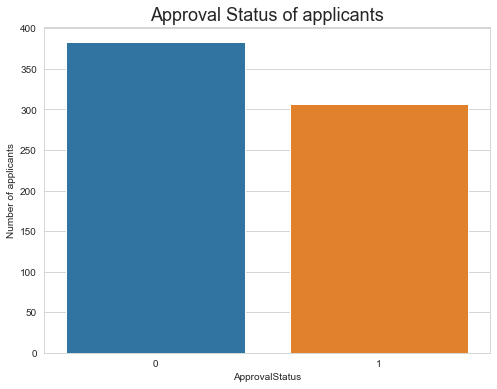

In [30]:
plt.figure(figsize = (8, 6))
ax = sns.countplot(cc_apps['ApprovalStatus'])
ax.set_ylabel('Number of applicants')
plt.title('Approval Status of applicants', size = 18)
plt.show()

#### From the figure above, just over 380 people got denied a credit card and 307 got approved of a credit card

#### How is the age distribution of credit card applicants in this data?

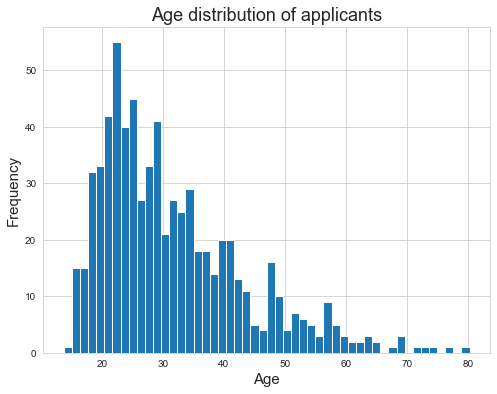

In [31]:
plt.figure(figsize = (8, 6))
cc_apps['Age'].plot(kind = 'hist', bins = 50)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Age distribution of applicants', size = 18)
plt.show()

In [32]:
print(cc_apps['Age'].max())
print(cc_apps['Age'].min())

80.25
13.75


In [33]:
## Create an Age_group column from the Age column to help understand the data
age_group = ['13-25', '25-50', '50+']
#creates age groups 
cc_apps['Age_group'] = pd.qcut(cc_apps['Age'], q = 3, labels = age_group)

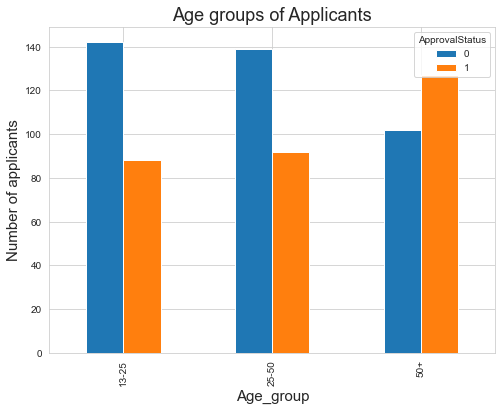

In [34]:
pd.pivot_table(data = cc_apps, index = ['Age_group'], columns = 'ApprovalStatus', aggfunc='size', fill_value=0).plot(kind = 'bar', figsize = (8,6))
plt.xlabel('Age_group', fontsize = 15)
plt.ylabel('Number of applicants', fontsize = 15)
plt.title('Age groups of Applicants', size = 18)
plt.show()

#### From the figure above, majority of the individuals that applied for credit card are within the age group 13-25 and 25-50. More people above 50 got approved of a credit card.¶


#### How does current job employment affect credit card approval?

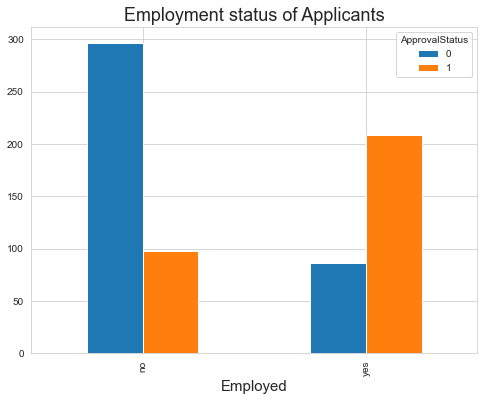

In [35]:
cc_apps.groupby(['Employed', 'ApprovalStatus'])['ApprovalStatus'].count().unstack('ApprovalStatus').fillna(0).plot(kind = 'bar', figsize = (8,6))
plt.xlabel('Employed', fontsize = 15)
plt.title('Employment status of Applicants', size = 18)
plt.show()

#### From the figure above, majority of the individual who got approved of a credit card were employed or had a job

#### How does Credit score and Income affect credit card approval?

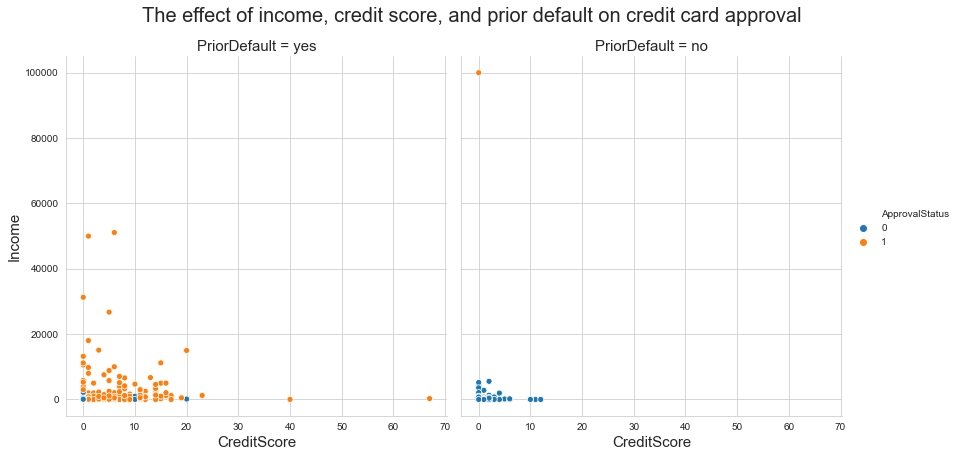

In [36]:
plt.rcParams["axes.labelsize"] = 15
a = sns.relplot(x='CreditScore', y = 'Income', hue = 'ApprovalStatus',  data = cc_apps, height = 6, aspect = 1, col = 'PriorDefault')
a.set_axis_labels('CreditScore', 'Income')
a.fig.suptitle('The effect of income, credit score, and prior default on credit card approval', position = [.5, 1.05], size = 20)
plt.savefig('prior_default_figure.png', bbox_inches = 'tight')
plt.show()

From the figure above, we deduce that applicants with high income and/or high credit score are likely to be approved to a credit card. **However, the most important feature that separates the dependendent variable - ApprovalStatus is PriorDefault. The figure shows that most people with PriorDefault are denied a credit card.** 

### Data Preprocessing

In [37]:
cc_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Gender          690 non-null    object  
 1   Age             690 non-null    float64 
 2   Debt            690 non-null    float64 
 3   Married         690 non-null    object  
 4   EducationLevel  690 non-null    object  
 5   Ethnicity       690 non-null    object  
 6   YearsEmployed   690 non-null    float64 
 7   PriorDefault    690 non-null    object  
 8   Employed        690 non-null    object  
 9   CreditScore     690 non-null    int64   
 10  DriversLicense  690 non-null    object  
 11  Citizen         690 non-null    object  
 12  ZipCode         690 non-null    category
 13  Income          690 non-null    int64   
 14  ApprovalStatus  690 non-null    int64   
 15  Age_group       690 non-null    category
dtypes: category(2), float64(3), int64(3), object(8)
memory usage: 

In [38]:
cc_apps[['Gender', 'Married', 'EducationLevel', 'Ethnicity', 'PriorDefault', 'Employed', 'Citizen', 'DriversLicense', 'Age_group']]

,Gender,Married,EducationLevel,Ethnicity,PriorDefault,Employed,Citizen,DriversLicense,Age_group
0,b,single,w,v,yes,yes,g,no,25-50
1,a,single,q,h,yes,yes,g,no,50+
2,a,single,q,h,yes,no,g,no,25-50
3,b,single,w,v,yes,yes,g,yes,25-50
4,b,single,w,v,yes,no,s,no,13-25
...,...,...,...,...,...,...,...,...,...
685,b,married,e,h,no,no,g,no,13-25
686,a,single,c,v,no,yes,g,yes,13-25
687,a,married,ff,ff,no,yes,g,yes,25-50
688,b,single,aa,v,no,no,g,no,13-25


In [39]:
cc_apps['ZipCode'].value_counts()

0       132
160      47
120      35
200      35
80       30
       ... 
311       1
600       1
329       1
333       1
2000      1
Name: ZipCode, Length: 170, dtype: int64

#### Drop ZipCode since it provides no relevant information here. 

In [40]:
cc_apps = cc_apps.drop('ZipCode', axis = 1)

#### Here, we will use pd.get_dummies to convert all of our categorical columns into numeric columns. We could also use OneHotEncoder from Sklearn.preprocessing

In [41]:
cc_apps.select_dtypes(include=['object', 'category'])

,Gender,Married,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen,Age_group
0,b,single,w,v,yes,yes,no,g,25-50
1,a,single,q,h,yes,yes,no,g,50+
2,a,single,q,h,yes,no,no,g,25-50
3,b,single,w,v,yes,yes,yes,g,25-50
4,b,single,w,v,yes,no,no,s,13-25
...,...,...,...,...,...,...,...,...,...
685,b,married,e,h,no,no,no,g,13-25
686,a,single,c,v,no,yes,yes,g,13-25
687,a,married,ff,ff,no,yes,yes,g,25-50
688,b,single,aa,v,no,no,no,g,13-25


In [42]:
#converting categoricatical columns into dummy variables. 
cc_apps_cat_df = pd.get_dummies(data = cc_apps.select_dtypes(include=['object', 'category']), drop_first=True)

In [43]:
#dataframe for numerical columns 
cc_app_num_df = cc_apps.select_dtypes(exclude = ['object', 'category'])

In [44]:
#concatenate categorical with numerical column
cc_apps_concat_df = pd.concat([cc_apps_cat_df, cc_app_num_df], axis = 'columns')

In [45]:
# from sklearn.model_selection import train_test_split

In [46]:
X = cc_apps_concat_df.drop('ApprovalStatus', axis = 'columns').values

In [47]:
y = cc_apps_concat_df['ApprovalStatus'].values

## Data Standardization

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [49]:
X

array([[1.00e+00, 1.00e+00, 0.00e+00, ..., 1.25e+00, 1.00e+00, 0.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, ..., 3.04e+00, 6.00e+00, 5.60e+02],
       [0.00e+00, 1.00e+00, 0.00e+00, ..., 1.50e+00, 0.00e+00, 8.24e+02],
       ...,
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 2.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 0.00e+00, ..., 4.00e-02, 0.00e+00, 7.50e+02],
       [1.00e+00, 1.00e+00, 0.00e+00, ..., 8.29e+00, 0.00e+00, 0.00e+00]])

In [50]:
X[:, 31:] = sc.fit_transform(X[:, 31:])

## Comparing machine learning algorithms

#### In this section, I will be comparing the performance of different machine learning algorithms on how well each one fits to the training data and prediction with test data. The scoring metric for comparison here is 'accuracy'

In [51]:
# import algorithms
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [52]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('Linear SVM', SVC(kernel = 'linear', C = 0.025)))
models.append(('RBF SVM', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier(max_depth = 3)))
models.append(('NB', GaussianNB()))
models.append(('AdaBoost', AdaBoostClassifier(n_estimators=10)))
models.append(('Random Forest', RandomForestClassifier(n_estimators = 20, max_depth = 5, max_features=20)))


# prepare configuration for cross validation test harness
random_state = 1

# evaluate each model in turn 
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = random_state)
    cv_results = model_selection.cross_val_score(estimator = model, X = X, y = y, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    message = "{}: mean = {}; std = {}".format(name, cv_results.mean(), cv_results.std())
    print(message)  

LR: mean = 0.8318840579710146; std = 0.17597807810620916
Linear SVM: mean = 0.856521739130435; std = 0.19833903874707903
RBF SVM: mean = 0.8318840579710145; std = 0.18505379361753468
KNN: mean = 0.7782608695652173; std = 0.12109040403074964
Decision Tree: mean = 0.7840579710144928; std = 0.1826834445585423
NB: mean = 0.7202898550724637; std = 0.18020618777201064
AdaBoost: mean = 0.8144927536231885; std = 0.1713335270276133
Random Forest: mean = 0.8159420289855074; std = 0.1890790645989323


In [53]:
model_df = pd.DataFrame()
model_df['name'] = names
model_df['mean_accuracy_score'] = np.mean(results, axis = 1)
model_df

,name,mean_accuracy_score
0,LR,0.831884
1,Linear SVM,0.856522
2,RBF SVM,0.831884
3,KNN,0.778261
4,Decision Tree,0.784058
5,NB,0.720290
6,AdaBoost,0.814493
7,Random Forest,0.815942


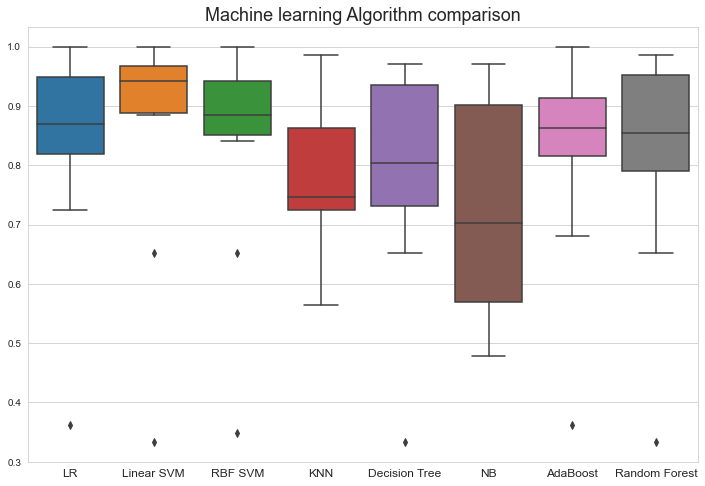

In [54]:
plt.figure(figsize = (12, 8))
ax = sns.boxplot(data=results)
ax.set_xticklabels(names, size = 12)
plt.title('Machine learning Algorithm comparison', size = 18)
plt.savefig('machine_learning_comparison.png')
plt.show()

#### From the figure above, we achieved the highest mean accuracy (85%) with Linear SVM algorithm. 

In [55]:
### Get most important feature responsible for determining which applicants get credit card or not. 
models

[('LR', LogisticRegression()),
 ('Linear SVM', SVC(C=0.025, kernel='linear')),
 ('RBF SVM', SVC()),
 ('KNN', KNeighborsClassifier()),
 ('Decision Tree', DecisionTreeClassifier(max_depth=3)),
 ('NB', GaussianNB()),
 ('AdaBoost', AdaBoostClassifier(n_estimators=10)),
 ('Random Forest',
  RandomForestClassifier(max_depth=5, max_features=20, n_estimators=20))]

### Random Forest model to determine the most important feature

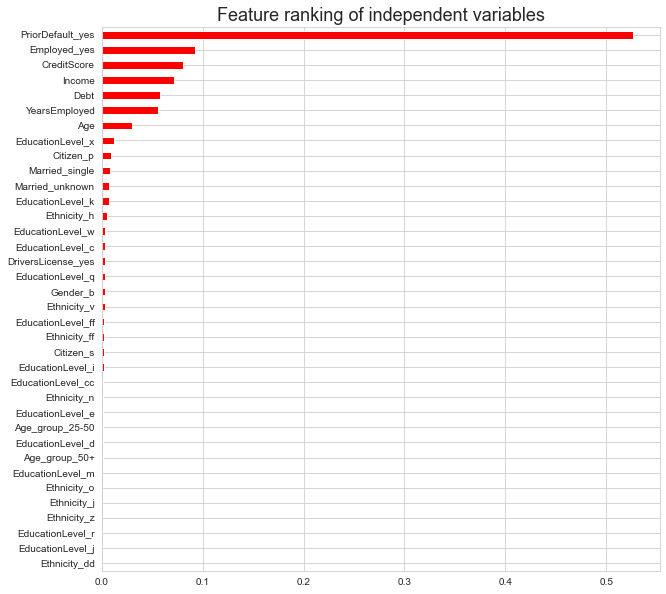

In [56]:
models[-1][-1].fit(X, y)
important_rf = pd.Series(models[-1][-1].feature_importances_, index = cc_apps_concat_df.columns[:-1])
sorted_important_rf = important_rf.sort_values()
ax = sorted_important_rf.plot(kind = 'barh', color = 'red', figsize = (10, 10), title = 'Feature ranking of independent variables')
ax.title.set_size(18)
plt.savefig('feature_ranking.png')
plt.show()


#### From the figure, Prior default and credit score are the two most important features that determine if an applicant get approved a credit card or not. 